### 1.1.8.6. Transformation Laws and the Jacobian

**Contravariant transformation** (prototype: differential length element):

$$
dx'^{\,i} = \frac{\partial x'^{\,i}}{\partial x^j}\, dx^j
$$

**Covariant transformation** (prototype: gradient of a scalar):

$$
\frac{\partial f}{\partial x'^{\,i}} = \frac{\partial x^j}{\partial x'^{\,i}}\, \frac{\partial f}{\partial x^j}
$$

**Jacobian matrix:**

$$
J^i_{\;j} = \frac{\partial x'^{\,i}}{\partial x^j}
$$

**Explanation:**

The partial derivatives $\frac{\partial x'^i}{\partial x^j}$ form the **Jacobian matrix**, which serves as the general transformation matrix between coordinate systems. Two prototypical quantities define the distinction between contravariant and covariant transformation behavior.

The **differential length element** $dx^i$ transforms with the Jacobian ("forward" partial derivatives $\frac{\partial x'^i}{\partial x^j}$). Any quantity that transforms in this manner is called **contravariant**.

The **gradient** $\frac{\partial f}{\partial x^i}$ transforms with the **inverse** Jacobian ("backward" partial derivatives $\frac{\partial x^j}{\partial x'^i}$). Any quantity that transforms in this manner is called **covariant**.

The Jacobian elements $\frac{\partial x'^i}{\partial x^j}$ are simultaneously the components of the original (covariant) basis vectors expressed in the new coordinate system. The inverse Jacobian elements $\frac{\partial x^j}{\partial x'^i}$ are the components of the dual (contravariant) basis vectors. This connects the algebraic transformation machinery to the geometric picture of basis and dual basis vectors from the preceding notebooks.

For orthonormal systems (e.g., Cartesian $\leftrightarrow$ Cartesian), the Jacobian is an orthogonal matrix and its inverse equals its transpose, so covariant and contravariant components coincide.

**Example:**

Transformation from polar $(r, \theta)$ to Cartesian $(x, y)$ with $x = r\cos\theta$, $y = r\sin\theta$:

$$
J = \begin{pmatrix}
\frac{\partial x}{\partial r} & \frac{\partial x}{\partial \theta} \\
\frac{\partial y}{\partial r} & \frac{\partial y}{\partial \theta}
\end{pmatrix}
=
\begin{pmatrix}
\cos\theta & -r\sin\theta \\
\sin\theta & r\cos\theta
\end{pmatrix}
$$

At $(r, \theta) = (2, \pi/6)$:

$$
J = \begin{pmatrix}
\cos 30° & -2\sin 30° \\
\sin 30° & 2\cos 30°
\end{pmatrix}
=
\begin{pmatrix}
0.866 & -1.000 \\
0.500 & 1.732
\end{pmatrix}
$$

The first column $\left(\cos\theta, \sin\theta\right)^T$ points radially outward ($\hat{r}$-direction). The second column $\left(-r\sin\theta, r\cos\theta\right)^T$ points in the $\hat{\theta}$-direction with magnitude $r$.

In [1]:
import numpy as np

radius = 2.0
angle = np.pi / 6

jacobian = np.array([
    [np.cos(angle), -radius * np.sin(angle)],
    [np.sin(angle),  radius * np.cos(angle)]
])

inverse_jacobian = np.linalg.inv(jacobian)

differential_polar = np.array([0.1, np.radians(5)])
differential_cartesian = jacobian @ differential_polar

gradient_cartesian = np.array([1.0, 0.5])
gradient_polar = inverse_jacobian.T @ gradient_cartesian

print("Jacobian J (polar → Cartesian):")
print(np.round(jacobian, 4))
print("\nInverse Jacobian J⁻¹:")
print(np.round(inverse_jacobian, 4))
print("\nJ × J⁻¹ (should be I):")
print(np.round(jacobian @ inverse_jacobian, 10))
print("\nContravariant: dr, dθ =", differential_polar, "→ dx, dy =", np.round(differential_cartesian, 4))
print("Covariant:     ∂f/∂x, ∂f/∂y =", gradient_cartesian, "→ ∂f/∂r, ∂f/∂θ =", np.round(gradient_polar, 4))

Jacobian J (polar → Cartesian):
[[ 0.866  -1.    ]
 [ 0.5     1.7321]]

Inverse Jacobian J⁻¹:
[[ 0.866  0.5  ]
 [-0.25   0.433]]

J × J⁻¹ (should be I):
[[1. 0.]
 [0. 1.]]

Contravariant: dr, dθ = [0.1        0.08726646] → dx, dy = [-0.0007  0.2011]
Covariant:     ∂f/∂x, ∂f/∂y = [1.  0.5] → ∂f/∂r, ∂f/∂θ = [0.741  0.7165]


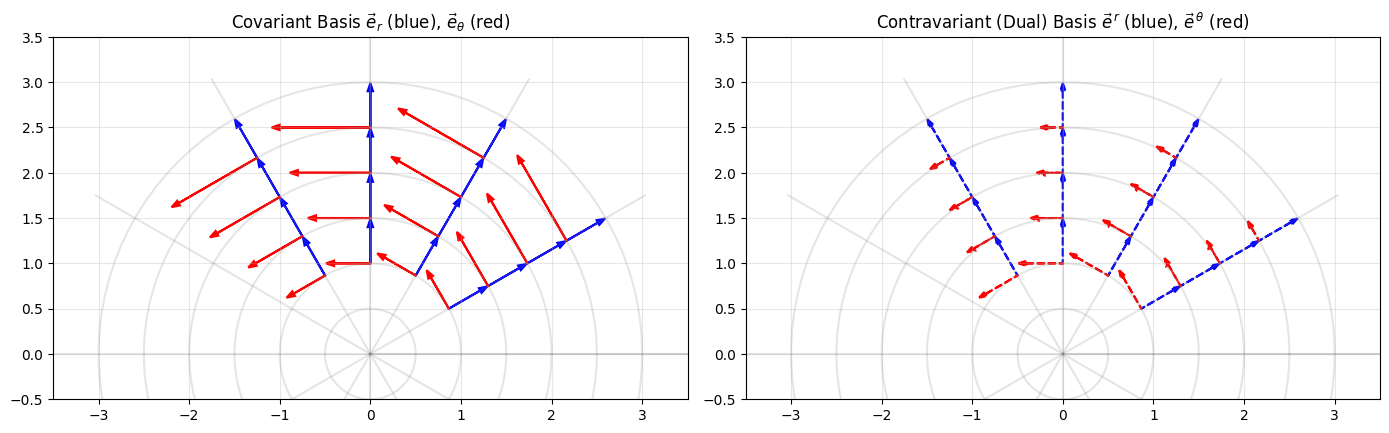

In [2]:
import matplotlib.pyplot as plt

radii = np.linspace(0.5, 3.0, 6)
angles = np.linspace(0, 2 * np.pi, 13)

figure, (axis_basis, axis_dual) = plt.subplots(1, 2, figsize=(14, 6))

sample_points_radius = np.array([1.0, 1.5, 2.0, 2.5])
sample_points_angle = np.array([np.pi / 6, np.pi / 3, np.pi / 2, 2 * np.pi / 3])

for axis in [axis_basis, axis_dual]:
    for radius_value in radii:
        circle_angles = np.linspace(0, 2 * np.pi, 100)
        axis.plot(radius_value * np.cos(circle_angles), radius_value * np.sin(circle_angles), "gray", alpha=0.2)
    for angle_value in angles:
        axis.plot([0, 3.5 * np.cos(angle_value)], [0, 3.5 * np.sin(angle_value)], "gray", alpha=0.2)

arrow_scale = 0.4
for radius_sample in sample_points_radius:
    for angle_sample in sample_points_angle:
        point_x = radius_sample * np.cos(angle_sample)
        point_y = radius_sample * np.sin(angle_sample)

        tangent_r = np.array([np.cos(angle_sample), np.sin(angle_sample)])
        tangent_theta = np.array([-radius_sample * np.sin(angle_sample), radius_sample * np.cos(angle_sample)])

        axis_basis.arrow(point_x, point_y, arrow_scale * tangent_r[0], arrow_scale * tangent_r[1],
                         head_width=0.06, color="blue", linewidth=1.5)
        axis_basis.arrow(point_x, point_y, arrow_scale * tangent_theta[0], arrow_scale * tangent_theta[1],
                         head_width=0.06, color="red", linewidth=1.5)

        jacobian_local = np.array([
            [np.cos(angle_sample), -radius_sample * np.sin(angle_sample)],
            [np.sin(angle_sample),  radius_sample * np.cos(angle_sample)]
        ])
        inv_jac = np.linalg.inv(jacobian_local)
        dual_r = inv_jac[0, :]
        dual_theta = inv_jac[1, :]

        axis_dual.arrow(point_x, point_y, arrow_scale * dual_r[0], arrow_scale * dual_r[1],
                        head_width=0.06, color="blue", linewidth=1.5, linestyle="--")
        axis_dual.arrow(point_x, point_y, arrow_scale * dual_theta[0], arrow_scale * dual_theta[1],
                        head_width=0.06, color="red", linewidth=1.5, linestyle="--")

axis_basis.set_title(r"Covariant Basis $\vec{e}_r$ (blue), $\vec{e}_\theta$ (red)")
axis_basis.set_xlim(-3.5, 3.5)
axis_basis.set_ylim(-0.5, 3.5)
axis_basis.set_aspect("equal")
axis_basis.grid(True, alpha=0.3)

axis_dual.set_title(r"Contravariant (Dual) Basis $\vec{e}^{\,r}$ (blue), $\vec{e}^{\,\theta}$ (red)")
axis_dual.set_xlim(-3.5, 3.5)
axis_dual.set_ylim(-0.5, 3.5)
axis_dual.set_aspect("equal")
axis_dual.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Generalized contravariant and covariant transformation laws:**

Many authors define the two types of vector component by their transformation rules:

$$
A'^{\,i} = \frac{\partial x'^{\,i}}{\partial x^j}\, A^j
\qquad \text{(contravariant)}
$$

$$
A'_i = \frac{\partial x^j}{\partial x'^{\,i}}\, A_j
\qquad \text{(covariant)}
$$

Contravariant components combine with covariant basis vectors (Jacobian columns), and covariant components combine with contravariant dual basis vectors (inverse Jacobian rows), so that the resulting vector $\vec{A} = A^i \vec{e}_i = A_i \vec{e}^{\,i}$ remains **invariant** under all coordinate transformations. This invariance is what qualifies vectors as **tensors of rank one**.

**References:**

[📘 Fleisch, D. (2012). *A Student's Guide to Vectors and Tensors*, §4.8–4.9](https://www.cambridge.org/highereducation/books/a-students-guide-to-vectors-and-tensors/39A82E78925B5CEAD0C3D00E4C381BBE)

---

[⬅️ Previous: Index Notation and Summation Convention](./05_index_notation_and_summation_convention.ipynb) | [Next: Multilinear Algebra and Tensors ➡️](../09_Multilinear_Algebra_and_Tensors/)